In [13]:
import pandas as pd
import re

file_path = 'Chicago_Community_Areas.xlsx'

dem_data = pd.read_excel(file_path)

dem_data.head()

xls = pd.ExcelFile(file_path)

ethnicity_df = xls.parse(sheet_name='Race & Ethnicity')
edu_df = xls.parse(sheet_name='Education')
inc_df = xls.parse(sheet_name='Income')

In [14]:
# cleans ethnicity_df

ethnicity_df = xls.parse(sheet_name='Race & Ethnicity')

ethnicity_df['Normalized'] = pd.Series([float('nan')] * len(ethnicity_df))
total_indices = list(range(1, len(ethnicity_df), 8))

for idx in total_indices:
    total_value = ethnicity_df.iloc[idx, 1]
    ethnicity_df.loc[idx, 'Normalized'] = total_value

ethnicity_df['Normalized'] = ethnicity_df['Normalized'].fillna(method='ffill')

ethnicity_df['Percentages'] = ethnicity_df.iloc[:, 1] / ethnicity_df['Normalized']

ethnicity_df['Percentages'] = ethnicity_df['Percentages'].round(3)

ethnicity_df = ethnicity_df.drop('Normalized', axis=1)
ethnicity_df = ethnicity_df.drop('Unnamed: 1', axis=1)

ethnicity_df.head(20)




,Unnamed: 0,Percentages
0,1. Rogers Park,NaN
1,Total,1.000
2,Not Hispanic or Latino: Asian alone,0.064
3,Not Hispanic or Latino: Black or African Ameri...,0.296
4,Hispanic or Latino,0.278
5,Not Hispanic or Latino: White alone,0.318
6,Not Hispanic or Latino: Other,0.045
7,NaN,NaN
8,2. West Ridge,NaN
9,Total,1.000


In [15]:
reshaped_data = []

for i in range(0, len(ethnicity_df), 8):
    neighborhood = ethnicity_df.iloc[i, 0]
    total = ethnicity_df.iloc[i + 1, 1]
    asian_alone = ethnicity_df.iloc[i + 2, 1]
    black_african_american_alone = ethnicity_df.iloc[i + 3, 1]
    hispanic_latino = ethnicity_df.iloc[i + 4, 1]
    white_alone = ethnicity_df.iloc[i + 5, 1]
    other = ethnicity_df.iloc[i + 6, 1]

    reshaped_data.append([neighborhood, total, asian_alone, black_african_american_alone, hispanic_latino, white_alone, other])

reshaped_ethnicity_df = pd.DataFrame(reshaped_data, columns=['Neighborhood Name', 'Total', 'Not Hispanic or Latino: Asian alone',
                                                             'Not Hispanic or Latino: Black or African American alone',
                                                             'Hispanic or Latino', 'Not Hispanic or Latino: White alone',
                                                             'Not Hispanic or Latino: Other'])

reshaped_ethnicity_df.head()


,Neighborhood Name,Total,Not Hispanic or Latino: Asian alone,Not Hispanic or Latino: Black or African American alone,Hispanic or Latino,Not Hispanic or Latino: White alone,Not Hispanic or Latino: Other
0,1. Rogers Park,1.0,0.064,0.296,0.278,0.318,0.045
1,2. West Ridge,1.0,0.223,0.068,0.155,0.497,0.056
2,3. Uptown,1.0,0.129,0.211,0.199,0.421,0.039
3,4. Lincoln Square,1.0,0.133,0.030,0.265,0.532,0.040
4,5. North Center,1.0,0.042,0.042,0.204,0.688,0.025


In [16]:
# cleans inc_df
inc_df = xls.parse(sheet_name='Income')

filtered_inc_df = inc_df[(inc_df.index % 20 == 18) | (inc_df.index % 20 == 0)]
filtered_inc_df.reset_index(drop=True, inplace=True)

reshaped_data = []

neighborhood = None
median_income = None

for index, row in filtered_inc_df.iterrows():
    print(index)
    print(row)
    if pd.isna(row[1]):
        if neighborhood:
            reshaped_data.append([neighborhood, median_income])
        neighborhood = row[0]
    else:
        median_income = row[1]

reshaped_data.append([neighborhood, median_income])


reshaped_inc_df = pd.DataFrame(reshaped_data, columns=['Neighborhood Name', 'Median household income'])

filtered_inc_df.tail(5)

reshaped_inc_df.tail()

0
Unnamed: 0    1. Rogers Park
Unnamed: 1               NaN
Name: 0, dtype: object
1
Unnamed: 0    Median household income
Unnamed: 1                      49055
Name: 1, dtype: object
2
Unnamed: 0    2. West Ridge
Unnamed: 1              NaN
Name: 2, dtype: object
3
Unnamed: 0    Median household income
Unnamed: 1                      63868
Name: 3, dtype: object
4
Unnamed: 0    3. Uptown
Unnamed: 1          NaN
Name: 4, dtype: object
5
Unnamed: 0    Median household income
Unnamed: 1                      50184
Name: 5, dtype: object
6
Unnamed: 0    4. Lincoln Square
Unnamed: 1                  NaN
Name: 6, dtype: object
7
Unnamed: 0    Median household income
Unnamed: 1                      63487
Name: 7, dtype: object
8
Unnamed: 0    5. North Center
Unnamed: 1                NaN
Name: 8, dtype: object
9
Unnamed: 0    Median household income
Unnamed: 1                      80344
Name: 9, dtype: object
10
Unnamed: 0    6. Lake View
Unnamed: 1             NaN
Name: 10, dtype: object
11


,Neighborhood Name,Median household income
72,73. Washington Heights,67061
73,74. Mount Greenwood,89246
74,75. Morgan Park,82479
75,76. O'Hare,65307
76,77. Edgewater,55520


In [17]:
# cleans education df

edu_df = xls.parse(sheet_name='Education')

filtered_edu_df = edu_df[(edu_df.index % 9 == 0) | (edu_df.index % 9 == 6) | (edu_df.index % 9 == 7)]
filtered_edu_df.reset_index(drop=True, inplace=True)
#filtered_edu_df.head(5)

reshaped_data = []

neighborhood = None
hs_grad_rate = None
ba_rate = None

for index, row in filtered_edu_df.iterrows():
    if pd.isna(row[1]):
        if neighborhood:
            reshaped_data.append([neighborhood, hs_grad_rate, ba_rate])
        neighborhood = row[0]
    else:
        if "HS Grad" in row[0]:
            hs_grad_rate = row[1]
        elif "BA" in row[0]:
            ba_rate = row[1]

reshaped_data.append([neighborhood, hs_grad_rate, ba_rate])


reshaped_edu_df = pd.DataFrame(reshaped_data, columns=['Neighborhood Name', 'Percent HS Grad or Higher', 'Percent with a BA or Higher'])

reshaped_edu_df.head()

,Neighborhood Name,Percent HS Grad or Higher,Percent with a BA or Higher
0,1. Rogers Park,0.745570,0.319622
1,2. West Ridge,0.804208,0.355746
2,3. Uptown,0.764437,0.394608
3,4. Lincoln Square,0.785025,0.380645
4,5. North Center,0.849566,0.481238


In [18]:
merged_df = pd.merge(reshaped_edu_df, reshaped_inc_df, on='Neighborhood Name')


merged_df = pd.merge(merged_df, reshaped_ethnicity_df, on='Neighborhood Name')
merged_df.drop(merged_df.columns[4], axis=1, inplace=True)

merged_df['Neighborhood Name'] = merged_df['Neighborhood Name'].apply(lambda x: re.sub(r'^\d+\.\s*', '', x))
merged_df.loc[merged_df['Neighborhood Name'] == 'Lower West Side', 'Neighborhood Name'] = 'Pilsen'
merged_df.loc[merged_df['Neighborhood Name'] == 'South Lawndale', 'Neighborhood Name'] = 'Little Village'
merged_df.loc[merged_df['Neighborhood Name'] == 'North Lawndale', 'Neighborhood Name'] = 'Lawndale'

In [19]:
### ADDING CICERO DATA

# https://www.point2homes.com/US/Neighborhood/IL/Cicero-Demographics.html
# https://www.infoplease.com/us/census/illinois/cicero

data = {'Neighborhood Name': ['Cicero'],
        'Percent HS Grad or Higher': [0.4617],
        'Percent with a BA or Higher': [0.0781],
        'Median household income': [38400],
        'Not Hispanic or Latino: Asian alone': [0.01],
        'Not Hispanic or Latino: Black or African American alone': [0.011],
        'Hispanic or Latino': [0.774],
        'Not Hispanic or Latino: White alone': [0.206],
        'Not Hispanic or Latino: Other': [0]}

cicero_row = pd.DataFrame(data)

merged_df = pd.concat([merged_df, cicero_row], ignore_index=True)

merged_df.tail()


merged_df.to_csv('demographics.csv', index=False)

merged_df.tail()

,Neighborhood Name,Percent HS Grad or Higher,Percent with a BA or Higher,Median household income,Not Hispanic or Latino: Asian alone,Not Hispanic or Latino: Black or African American alone,Hispanic or Latino,Not Hispanic or Latino: White alone,Not Hispanic or Latino: Other
73,Mount Greenwood,0.905194,0.209039,89246,0.003,0.036,0.038,0.910,0.013
74,Morgan Park,0.844395,0.272031,82479,0.003,0.667,0.021,0.298,0.011
75,O'Hare,0.827264,0.293293,65307,0.074,0.022,0.065,0.814,0.026
76,Edgewater,0.833856,0.418605,55520,0.115,0.170,0.196,0.479,0.040
77,Cicero,0.461700,0.078100,38400,0.010,0.011,0.774,0.206,0.000


In [20]:
### ADDING BERWYN DATA

# https://www.census.gov/quickfacts/fact/table/berwyncityillinois


data_berwyn = {'Neighborhood Name': ['Berwyn'],
        'Percent HS Grad or Higher': [0.8390],
        'Percent with a BA or Higher': [0.2450],
        'Median household income': [71300],
        'Not Hispanic or Latino: Asian alone': [0.037],
        'Not Hispanic or Latino: Black or African American alone': [0.088],
        'Hispanic or Latino': [0.610],
        'Not Hispanic or Latino: White alone': [0.262],
        'Not Hispanic or Latino: Other': [0]}

berwyn_row = pd.DataFrame(data_berwyn)

merged_df = pd.concat([merged_df, berwyn_row], ignore_index=True)

merged_df.tail()

merged_df.to_csv('demographics.csv', index=False)

merged_df.tail()

,Neighborhood Name,Percent HS Grad or Higher,Percent with a BA or Higher,Median household income,Not Hispanic or Latino: Asian alone,Not Hispanic or Latino: Black or African American alone,Hispanic or Latino,Not Hispanic or Latino: White alone,Not Hispanic or Latino: Other
74,Morgan Park,0.844395,0.272031,82479,0.003,0.667,0.021,0.298,0.011
75,O'Hare,0.827264,0.293293,65307,0.074,0.022,0.065,0.814,0.026
76,Edgewater,0.833856,0.418605,55520,0.115,0.170,0.196,0.479,0.040
77,Cicero,0.461700,0.078100,38400,0.010,0.011,0.774,0.206,0.000
78,Berwyn,0.839000,0.245000,71300,0.037,0.088,0.610,0.262,0.000


In [21]:
### ADDING OAK PARK DATA

# https://www.census.gov/quickfacts/fact/table/berwyncityillinois


data_oakpark = {'Neighborhood Name': ['Oak Park'],
        'Percent HS Grad or Higher': [0.9710],
        'Percent with a BA or Higher': [0.718],
        'Median household income': [103264],
        'Not Hispanic or Latino: Asian alone': [0.059],
        'Not Hispanic or Latino: Black or African American alone': [0.190],
        'Hispanic or Latino': [0.093],
        'Not Hispanic or Latino: White alone': [0.600],
        'Not Hispanic or Latino: Other': [0]}

oakpark_row = pd.DataFrame(data_oakpark)

merged_df = pd.concat([merged_df, oakpark_row], ignore_index=True)

merged_df.tail()

merged_df.to_csv('demographics.csv', index=False)

merged_df.tail()

,Neighborhood Name,Percent HS Grad or Higher,Percent with a BA or Higher,Median household income,Not Hispanic or Latino: Asian alone,Not Hispanic or Latino: Black or African American alone,Hispanic or Latino,Not Hispanic or Latino: White alone,Not Hispanic or Latino: Other
75,O'Hare,0.827264,0.293293,65307,0.074,0.022,0.065,0.814,0.026
76,Edgewater,0.833856,0.418605,55520,0.115,0.170,0.196,0.479,0.040
77,Cicero,0.461700,0.078100,38400,0.010,0.011,0.774,0.206,0.000
78,Berwyn,0.839000,0.245000,71300,0.037,0.088,0.610,0.262,0.000
79,Oak Park,0.971000,0.718000,103264,0.059,0.190,0.093,0.600,0.000


In [22]:
# Merge with Home Value Index Data

file_path_2 = "zillow_singlefamily_chicago.xlsx"

homevalue_df = pd.read_excel(file_path_2)
homevalue_df = homevalue_df.rename(columns={'RegionName': 'Neighborhood Name'})


file_path_3 = "zillow_singlefamily_zipcode_chicago.xlsx"
homevalue_zip_df = pd.read_excel(file_path_3)
homevalue_zip_df = homevalue_zip_df[homevalue_zip_df['City'].isin(['Cicero', 'Berwyn', 'Oak Park'])]
homevalue_zip_df['RegionName'] = homevalue_zip_df['City']
homevalue_zip_df = homevalue_zip_df.rename(columns={'RegionName': 'Neighborhood Name'})


homevalue_df = pd.concat([homevalue_df, homevalue_zip_df], ignore_index=True)
homevalue_df.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName', 'State', 'City',
              'Metro', 'CountyName'], axis=1, inplace=True)

# Combine into Near North Side

combine_values = {'Near North Side': ['Gold Coast', 'Streeterville', 'River North', 'Goose Island','Old Town'],
                 'Norwood Park': ['Norwood Park East', 'Norwood Park West', 'Big Oaks', 'Oriole Park', 'Union Ridge'],
                 'Belmont Cragin': ['Belmont Central', 'Cragin', 'Hanson Park', 'Kelvyn Park', 'Montclare'],
                 'Austin': ['Galewood', 'The Island', 'North Austin', 'South Austin'],
                 'Loop': ['The Loop', 'New Eastside', 'Printer\'s Row', 'South Loop','Historic Michigan Boulevard District'],
                 'Near South Side': ['Dearborn Park'],
                 'Armour Square': ['Chinatown'],
                 'Douglas': ['Groveland Park', 'Lake Meadows', 'The Gap', 'South Commons'],
                 'Grand Boulevard': ['Bronzeville'],
                 'New City': ['Back of the Yards', 'Canaryville'],
                 'Greater Grand Crossing': ['Grand Crossing', 'Park Manor', 'Winneconna Parkway'],
                 'Auburn Gresham': ['Gresham']}
to_combined_df = pd.DataFrame()

for key, values in combine_values.items():
    combined_rows = homevalue_df[homevalue_df['Neighborhood Name'].isin(values)]
    new_row = pd.DataFrame(combined_rows.mean(numeric_only=True)).T

    new_row['Neighborhood Name'] = key
    new_row = new_row[homevalue_df.columns]

    to_combined_df = pd.concat([to_combined_df, new_row], ignore_index = True)


homevalue_df = pd.concat([homevalue_df, to_combined_df], ignore_index=True)

total_df = pd.merge(merged_df, homevalue_df,
                    on='Neighborhood Name')

total_df.to_csv('homevalue_demograhics_combined.csv', index=False)
total_df = total_df.drop([80, 82])
total_df.reset_index(drop=True, inplace=True)

total_df


,Neighborhood Name,Percent HS Grad or Higher,Percent with a BA or Higher,Median household income,Not Hispanic or Latino: Asian alone,Not Hispanic or Latino: Black or African American alone,Hispanic or Latino,Not Hispanic or Latino: White alone,Not Hispanic or Latino: Other,2000-01-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
0,Rogers Park,0.745570,0.319622,49055,0.064,0.296,0.278,0.318,0.045,104242.361901,...,286984.629836,288858.185966,290919.553039,292726.175899,294611.122682,295919.452662,297271.672487,298416.820947,299270.135421,300024.436778
1,West Ridge,0.804208,0.355746,63868,0.223,0.068,0.155,0.497,0.056,142419.207399,...,346369.137230,347271.121838,349175.399098,351687.407635,354045.050774,355142.858523,355173.433491,355066.464980,355050.957052,355680.286950
2,Uptown,0.764437,0.394608,50184,0.129,0.211,0.199,0.421,0.039,146510.573525,...,331180.882590,333267.874367,336170.140519,339013.302644,341779.555596,344056.365756,345755.403695,347092.698921,347487.570014,347713.161099
3,Lincoln Square,0.785025,0.380645,63487,0.133,0.030,0.265,0.532,0.040,227197.691134,...,636717.015333,640045.072531,644745.290506,649031.218822,651233.571341,651808.270784,651785.815380,651368.750000,650342.727266,648815.411050
4,North Center,0.849566,0.481238,80344,0.042,0.042,0.204,0.688,0.025,354773.426097,...,943766.363738,948878.393084,954983.853203,960280.428303,961903.301576,960293.453031,957067.858571,953656.050306,949501.238826,945670.563890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,O'Hare,0.827264,0.293293,65307,0.074,0.022,0.065,0.814,0.026,179148.975137,...,333070.167005,333690.131604,335119.917715,337261.735055,339440.646141,341159.282246,342334.149369,343358.638317,344135.456632,344730.319241
77,Edgewater,0.833856,0.418605,55520,0.115,0.170,0.196,0.479,0.040,129155.290990,...,322612.379118,324695.108273,327298.326940,329882.316258,332248.300124,334420.367697,336267.549638,338040.996142,339019.101934,339672.385790
78,Cicero,0.461700,0.078100,38400,0.010,0.011,0.774,0.206,0.000,92992.458104,...,225703.439874,225899.651987,226366.634083,227317.527253,229180.733771,231021.724562,232944.840610,233969.163782,234384.178355,234143.902660
79,Berwyn,0.839000,0.245000,71300,0.037,0.088,0.610,0.262,0.000,120464.930532,...,258335.643964,259147.895105,259844.255978,260890.476329,262765.283935,264516.568793,266206.415720,267496.525236,268245.412698,268472.564110


In [23]:
# Conduct balancing test
# Adding a treatment status variable
treatment_neighborhoods = ["Cicero", "Berwyn", "Oak Park", "Little Village", "Humboldt Park",
                           "Lawndale", "East Garfield Park", "West Garfield Park", "West Town",
                           "Near West Side", "Pilsen"]

total_df["Treatment Status"] = 0
total_df.loc[total_df["Neighborhood Name"].isin(treatment_neighborhoods), "Treatment Status"] = 1

total_df.tail()

# Balancing Test
import numpy as np
from scipy.stats import ttest_ind

# Define treated and control groups based on treatment status
treated_df = total_df[total_df["Treatment Status"] == 1]
control_df = total_df[total_df["Treatment Status"] == 0]

# Define covariates
covariates = ["Percent HS Grad or Higher", "Percent with a BA or Higher",
              "Median household income", "Not Hispanic or Latino: Asian alone",
              "Not Hispanic or Latino: Black or African American alone",
              "Hispanic or Latino", "Not Hispanic or Latino: White alone",
              "Not Hispanic or Latino: Other"]

for covariate in covariates:
    treated_mean = treated_df[covariate].mean()
    control_mean = control_df[covariate].mean()

    t_statistic, p_value = ttest_ind(treated_df[covariate], control_df[covariate])

    print(f"Balancing test for covariate '{covariate}':")
    print(f"Treated group mean: {treated_mean}")
    print(f"Control group mean: {control_mean}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    print("")

    # Check for statistical significance (p-value < 0.05) and print results
    if p_value < 0.05:
        print(f"The difference in means for '{covariate}' is statistically significant (p < 0.05).")
    else:
        print(f"The difference in means for '{covariate}' is not statistically significant (p >= 0.05).")
    print("-----------------------------------")



Balancing test for covariate 'Percent HS Grad or Higher':
Treated group mean: 0.6170636852333516
Control group mean: 0.724133092722449
T-statistic: -2.5002311203366543
P-value: 0.01448182498474616

The difference in means for 'Percent HS Grad or Higher' is statistically significant (p < 0.05).
-----------------------------------
Balancing test for covariate 'Percent with a BA or Higher':
Treated group mean: 0.19644184527281186
Control group mean: 0.22149942431463357
T-statistic: -0.42468055146382455
P-value: 0.6722239628901198

The difference in means for 'Percent with a BA or Higher' is not statistically significant (p >= 0.05).
-----------------------------------
Balancing test for covariate 'Median household income':
Treated group mean: 50828.90909090909
Control group mean: 60371.114285714284
T-statistic: -1.4302678699117086
P-value: 0.15658350719891512

The difference in means for 'Median household income' is not statistically significant (p >= 0.05).
------------------------------

In [24]:
#install DML package, skip if already downloaded
!pip install -U DoubleML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 2.0 MB/s eta 0:00:00


In [25]:
# additional data cleaning to get rid of NaNs and duplicate Washington Park row
print(np.where(total_df['Neighborhood Name'] == 'Washington Park'))
total_df_copy = total_df.replace(np.nan, 0)
total_df_copy = total_df_copy.drop(40, 0)
print(np.where(total_df_copy['Neighborhood Name'] == 'Washington Park'))
total_df = total_df_copy

(array([39, 40]),)
(array([39]),)


<ipython-input-25-ba9e41d46346>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  total_df_copy = total_df_copy.drop(40, 0)


In [26]:
# adding crime data
crime = pd.read_csv('/content/chicago_crime.csv')
print(crime.columns)
crime = crime.rename(columns={'Neighborhood': 'Neighborhood Name'})
print(crime.head(10))
total_df['Neighborhood Name'] = total_df['Neighborhood Name'].astype(str)
crime['Neighborhood Name'] = crime['Neighborhood Name'].astype(str)
total_df = pd.merge(total_df,crime, on='Neighborhood Name')

Index(['Neighborhood', 'Crimes'], dtype='object')
  Neighborhood Name  Crimes
0       Rogers Park   28992
1        West Ridge   20930
2            Uptown   28625
3    Lincoln Square   12660
4      North Center   11841
5         Lake View   31849
6      Lincoln Park   27972
7   Near North Side   58549
8       Edison Park    1616
9      Norwood Park    7210


In [27]:
# adding parks data
parks = pd.read_csv('/content/updated_neighborhood_park_coverage.csv')
print(parks.columns)
print(parks.head(10))
parks['Neighborhood Name'] = parks['Neighborhood Name'].astype(str)
total_df = pd.merge(total_df,parks, on='Neighborhood Name')

Index(['Neighborhood Name', 'park_coverage_percentage'], dtype='object')
  Neighborhood Name  park_coverage_percentage
0       Albany Park                  2.733573
1    Archer Heights                  1.756930
2     Armour Square                  2.816747
3           Ashburn                  1.946591
4    Auburn Gresham                  2.498760
5            Austin                  4.351867
6       Avalon Park                  3.505546
7          Avondale                  0.691102
8    Belmont Cragin                  4.829556
9           Beverly                  1.922312


In [28]:
#fixing column order
cols = list(total_df.columns)
cols.insert(9,'park_coverage_percentage')
cols.insert(10,'Crimes')
cols.pop(-1)
cols.pop(-1)
print(cols)
total_df = total_df[cols]

['Neighborhood Name', 'Percent HS Grad or Higher', 'Percent with a BA or Higher', 'Median household income', 'Not Hispanic or Latino: Asian alone', 'Not Hispanic or Latino: Black or African American alone', 'Hispanic or Latino', 'Not Hispanic or Latino: White alone', 'Not Hispanic or Latino: Other', 'park_coverage_percentage', 'Crimes', '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31', '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31', '2003-09-30', '2003-10-31', '2003-11-30', '20

In [29]:
print(len(total_df.columns))
print(total_df.columns[299])

301
2024-01-31


In [30]:
# creating quarterly and yearly aggregates for difference
covariates.append("Crimes")
covariates.append("park_coverage_percentage")
year = 2000
quarter = 1
for i in range(11,299,3):
  months = list(range(i,i+3))
  q_avg = total_df.iloc[:,months].mean(axis=1)
  col_name = str(year) + 'q' + str(quarter)
  total_df[col_name] = q_avg
  if quarter == 4:
    year += 1
    quarter = 0
  quarter += 1

year = 2000
for i in range(11,299,12):
  months = list(range(i,i+12))
  y_avg = total_df.iloc[:,months].mean(axis=1)
  col_name = str(year)
  total_df[col_name] = y_avg
  year += 1

In [31]:
print(list(total_df.columns).index('2000q1'))
print(list(total_df.columns).index('2000'))

301
397


In [32]:
# treatment effects over time
from doubleml import DoubleMLData
from doubleml import DoubleMLDID
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.base import clone

ml_g = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_m = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)

coefs = []
lower = []
upper = []
quarters = total_df.columns[302:398]

last = total_df.columns[301]

for quarter in quarters:
  total_df['y_quarter'] = total_df[quarter] - total_df[last]
  dml_data = DoubleMLData(total_df,
                            y_col = 'y_quarter',
                            d_cols = 'Treatment Status',
                            x_cols = covariates[:10])
  dml_did = DoubleMLDID(dml_data,
                        ml_g=clone(ml_g),
                        ml_m=clone(ml_m))
  dml_did.fit()
  coefs.append(dml_did.coef)
  lower.append(dml_did.confint()['2.5 %'].iloc[0])
  upper.append(dml_did.confint()['97.5 %'].iloc[0])
  last = quarter

/usr/local/lib/python3.10/dist-packages/doubleml/_utils_checks.py:204: UserWarning: Propensity predictions from learner RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=2) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(f'Propensity predictions from learner {str(learner)} for'
/usr/local/lib/python3.10/dist-packages/doubleml/_utils_checks.py:204: UserWarning: Propensity predictions from learner RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=2) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(f'Propensity predictions from learner {str(learner)} for'
/usr/local/lib/python3.10/dist-packages/doubleml/_utils_checks.py:204: UserWarning: Propensity predictions from learner RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=2) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(f'Propensity predictions from learner {str(learner)} for'
/usr/local/lib/python3.10/dist-packages/doubleml/_utils_ch

In [82]:
ycoefs = []
ylower = []
yupper = []
years = total_df.columns[399:]
pvals = []

last = total_df.columns[398]

for year in years:
  total_df['y_year'] = total_df[year] - total_df[last]
  dml_data = DoubleMLData(total_df,
                            y_col = 'y_year',
                            d_cols = 'Treatment Status',
                            x_cols = covariates[:10])
  dml_did = DoubleMLDID(dml_data,
                        ml_g=clone(ml_g),
                        ml_m=clone(ml_m))
  dml_did.fit()
  ycoefs.append(dml_did.coef)
  ylower.append(dml_did.confint()['2.5 %'].iloc[0])
  yupper.append(dml_did.confint()['97.5 %'].iloc[0])
  pvals.append(dml_did.pval)
  last = year

/usr/local/lib/python3.10/dist-packages/doubleml/_utils_checks.py:204: UserWarning: Propensity predictions from learner RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=2) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(f'Propensity predictions from learner {str(learner)} for'
/usr/local/lib/python3.10/dist-packages/doubleml/_utils_checks.py:204: UserWarning: Propensity predictions from learner RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=2) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(f'Propensity predictions from learner {str(learner)} for'
/usr/local/lib/python3.10/dist-packages/doubleml/_utils_checks.py:204: UserWarning: Propensity predictions from learner RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=2) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(f'Propensity predictions from learner {str(learner)} for'
/usr/local/lib/python3.10/dist-packages/doubleml/_utils_ch

In [34]:
print(dml_did)

================== DoubleMLDID Object ==================

------------------ Data summary      ------------------
Outcome variable: y_year
Treatment variable(s): ['Treatment Status']
Covariates: ['Percent HS Grad or Higher', 'Percent with a BA or Higher', 'Median household income', 'Not Hispanic or Latino: Asian alone', 'Not Hispanic or Latino: Black or African American alone', 'Hispanic or Latino', 'Not Hispanic or Latino: White alone', 'Not Hispanic or Latino: Other', 'Crimes', 'park_coverage_percentage']
Instrument variable(s): None
No. Observations: 73

------------------ Score & algorithm ------------------
Score function: observational
DML algorithm: dml2

------------------ Machine learner   ------------------
Learner ml_g: RandomForestRegressor(max_depth=5, max_features=20, min_samples_leaf=2)
Learner ml_m: RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=2)
Out-of-sample Performance:
Learner ml_g0 RMSE: [[196445.86431201]]
Learner ml_g1 RMSE: [[342466.6932

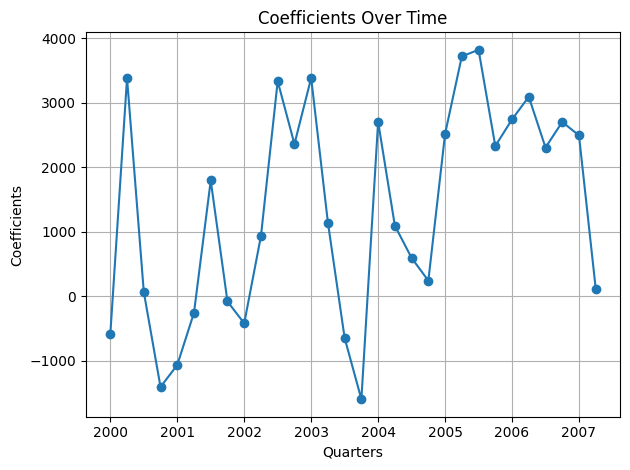

In [35]:
import matplotlib.pyplot as plt
plt.plot(quarters[:30], coefs[:30], marker='o', linestyle='-')
plt.xticks(ticks = quarters[:30:4], labels = ['2000','2001','2002','2003','2004','2005','2006','2007'])
plt.xlabel('Quarters')
plt.ylabel('Coefficients')
plt.title('Coefficients Over Time')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

[[10546.249638174508, 8586.277192588965, 9690.794755383347, 4804.989011550174, 15175.33445640356, 17911.966218579088, 26026.78334631415, 10332.184411268228, 11795.231463167649, 11942.827181490939], [10546.249638174508, 8586.277192588965, 9690.794755383347, 4804.989011550175, 15175.334456403558, 17911.966218579088, 26026.78334631415, 10332.184411268228, 11795.231463167649, 11942.827181490939]]
[  5172.36127788   3676.96453971  10286.85250612   6917.69501559
 -10619.75400062 -13232.66668078]


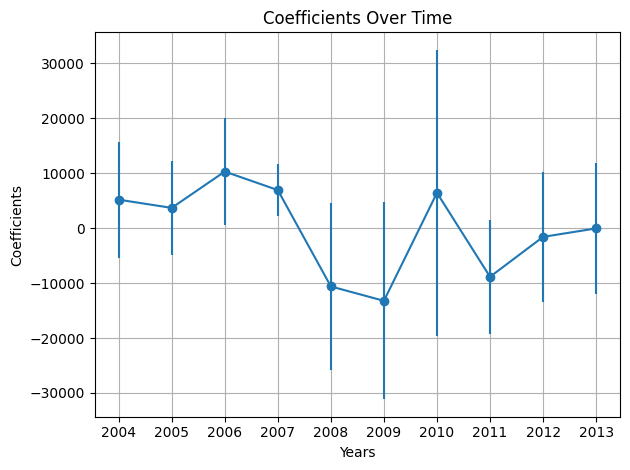

In [83]:
errors_lower = [ycoefs[i] - ylower[i] for i in range(2,12)]
errors_upper = [yupper[i] - ycoefs[i] for i in range(2,12)]
y_err = [list(np.ravel(errors_lower)), list(np.ravel(errors_upper))]
print(y_err)
print(np.ravel(ycoefs[2:8]))

plt.errorbar(np.ravel(years[2:12]), np.ravel(ycoefs[2:12]), yerr=y_err, marker='o', linestyle='-', color='#1F77B4',
             ecolor='#1F77B4', label='Estimated Effect (with CI)')
plt.xlabel('Years')
plt.ylabel('Coefficients')
plt.title('Coefficients Over Time')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
for i in range(2,12):
  print(str(years[i]) + ' & ' + str(np.round(ycoefs[i][0],decimals=1)) + ' & ' + str(np.round(ylower[i],decimals=1)) + ' & ' + str(np.round(yupper[i],decimals=1)) + ' & ' + str(np.round(pvals[i][0],decimals=3)) + ' \\\ ')

2004 & 5172.4 & -5373.9 & 15718.6 & 0.336 \\ 
2005 & 3677.0 & -4909.3 & 12263.2 & 0.401 \\ 
2006 & 10286.9 & 596.1 & 19977.6 & 0.037 \\ 
2007 & 6917.7 & 2112.7 & 11722.7 & 0.005 \\ 
2008 & -10619.8 & -25795.1 & 4555.6 & 0.17 \\ 
2009 & -13232.7 & -31144.6 & 4679.3 & 0.148 \\ 
2010 & 6416.1 & -19610.7 & 32442.9 & 0.629 \\ 
2011 & -8867.3 & -19199.4 & 1464.9 & 0.093 \\ 
2012 & -1596.9 & -13392.2 & 10198.3 & 0.791 \\ 
2013 & -55.7 & -11998.5 & 11887.1 & 0.993 \\ 
